In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read offense data
offense = pd.read_csv('data/offense.csv')
# read defense data
defense = pd.read_csv('data/defense.csv')
# read salary data
salary = pd.read_csv('data/salary.csv', index_col=0)
# change columns (uppercase first letter) to match the other data
salary.columns = ['Team', 'Year'] + list(salary.columns[2:])
# read standings data
standings = pd.read_csv('data/standings.csv')

Need to fix the offense and defense stats so that they are the previous year. Can do this by adding 1 to the year before merging the datasets. Salary is known at the beginning of the season so the year doesn't have to change.

In [3]:
offense['Year'] += 1
defense['Year'] += 1

In [4]:
# merge the offense and defense data with suffixes
combined = pd.merge(offense, defense, on=['Team', 'Year'], suffixes=('_off', '_def'))
# merge the salary data
combined = pd.merge(combined, salary, on=['Team', 'Year'])
# merge the standings dataframe - use left so 2018 data stays
combined = pd.merge(combined, standings, on=['Team', 'Year'], how='left')
# now split out the X and y from combined
X = combined[combined.columns[:-8]].copy()
y = combined[combined.columns[-8:]].copy()
y.insert(0, 'Team', X['Team'])
y.insert(1, 'Year', X['Year'])
display(X.head())
display(y.head())

,Team,Year,Yds/G_rush_off,TD_rush_off,Yds/G_pass_off,Pct_off,TD_pass_off,Sck_off,Rate_off,Pts/G_off,...,WR,nDL,nLB,nOL,nQB,nRB,nS,nST,nTE,nWR
0,WAS,2013,169.3,22.0,213.9,65.8,24.0,33.0,102.1,27.2,...,19610688.0,9.0,13.0,10.0,3.0,5.0,12.0,4.0,4.0,8.0
1,MIN,2013,164.6,16.0,171.9,62.1,18.0,32.0,81.2,23.7,...,9698856.0,10.0,8.0,10.0,4.0,4.0,11.0,3.0,4.0,6.0
2,SEA,2013,161.2,16.0,189.4,64.0,27.0,33.0,100.6,25.8,...,16831421.0,12.0,8.0,10.0,2.0,4.0,12.0,3.0,4.0,7.0
3,SF,2013,155.7,17.0,206.1,66.3,23.0,41.0,101.2,24.8,...,16945181.0,9.0,9.0,10.0,2.0,5.0,11.0,3.0,4.0,7.0
4,KC,2013,149.7,9.0,169.6,57.5,8.0,40.0,63.8,13.2,...,7268150.0,7.0,9.0,12.0,3.0,4.0,10.0,3.0,5.0,6.0


,Team,Year,W,L,T,PF,PA,DIFF,Playoffs,SB_win
0,WAS,2013,3.0,13.0,0.0,334.0,478.0,-144.0,0.0,0.0
1,MIN,2013,5.0,10.0,1.0,391.0,480.0,-89.0,0.0,0.0
2,SEA,2013,13.0,3.0,0.0,417.0,231.0,186.0,1.0,1.0
3,SF,2013,12.0,4.0,0.0,406.0,272.0,134.0,1.0,0.0
4,KC,2013,11.0,5.0,0.0,430.0,305.0,125.0,1.0,0.0


## Feature Descriptions
**Team** - Team abbreviation (2 or 3 characters)

**Year** - Year of start of season

**Team Stats** (Previous Year)
* **TO** - Turnover differential

**Offensive Stats** (Previous Year)
* **Yds/G_rush_off** - Yards per game rushing by offense
* **TD_rush_off** - Number of rushing touchdowns by offense
* **Yds/G_pass_off** - Yards per game passing by offense
* **Pct_off** - Completion percentage by offense
* **TD_pass_off** - Number of passing touchdowns by offense
* **Sck_off** - Number of sacks allowed by offense
* **Rate_off** - Quarterback rating by offense
* **Pts/G_off** - Points per game by the offense
* **Pen Yds_off** - Penalty yards by offense

**Defensive Stats** (Previous Year)
* **Yds/G_rush_def** - Yards per game rushing allowed by defense
* **TD_rush_def** - Number of rushing touchdowns allowed by defense
* **Yds/G_pass_def** - Yards per game passing allowed by defense
* **TD_pass_def** - Number of passing touchdowns allowed by defense
* **Rate_def** - Quarterback rating allowed by defense
* **Sck_def** - Number of sacks by defense
* **Pct_def** - Completion percentage allowed by defense
* **Pts/G_def** - Points per game allowed by defense
* **Pen Yds_def** - Penalty yards by defense

**Salary Spending by Position** (Current Year)
* **QB** - Quarterback salary
* **RB** - Running back salary
* **WR** - Wide receiver salary
* **TE** - Tight end salary
* **OL** - Offensive line salary
* **DL** - Defensive line salary
* **LB** - Linebacker salary
* **S** - Secondary salary
* **ST** - Special teams salary

**Number of Players per Position** (Current Year)
* **nQB** - Number of quarterbacks
* **nRB** - Number of running backs
* **nWR** - Number of wide receivers
* **nTE** - Number of tight ends
* **nOL** - Number of offensive linemen
* **nDL** - Number of defensive linemen
* **nLB** - Number of linebackers
* **nS** - Number of secondary players
* **nST** - Number of special teams players

In [5]:
pp.ProfileReport(combined[combined.columns[2:]])

Number of variables,45
Number of observations,192
Total Missing (%),2.6%
Total size in memory,69.0 KiB
Average record size in memory,368.0 B
Numeric,44
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


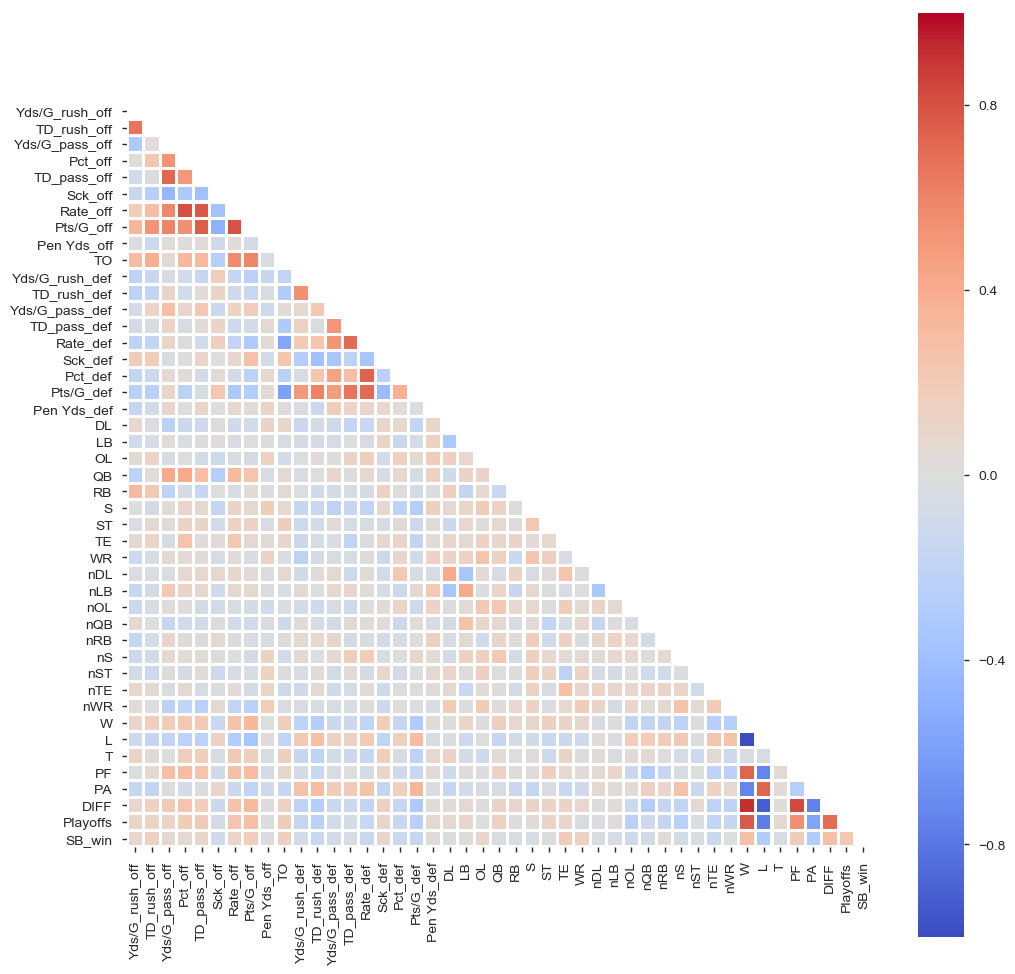

In [6]:
corr = combined[combined.columns[2:]].corr()

import seaborn as sns
from matplotlib.colors import ListedColormap

labels = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
labels = labels.replace(np.nan,' ', regex=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

mask = np.triu(np.ones(corr.shape)).astype(np.bool)

_ = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', square=True, ax=ax)

mask = np.ones(mask.shape)-mask

_ = sns.heatmap(corr, mask=mask, cmap=ListedColormap(['white']),cbar=False, fmt='', 
                linewidths=1.5, ax=ax)

Check out the highly correlated features

/Users/tsansom/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


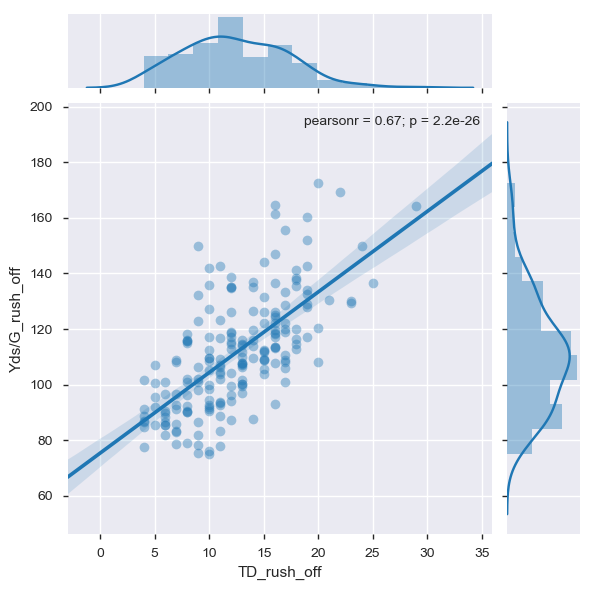

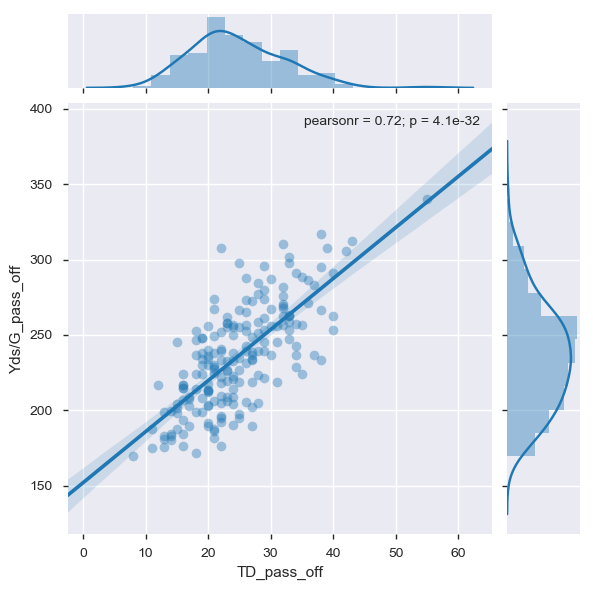

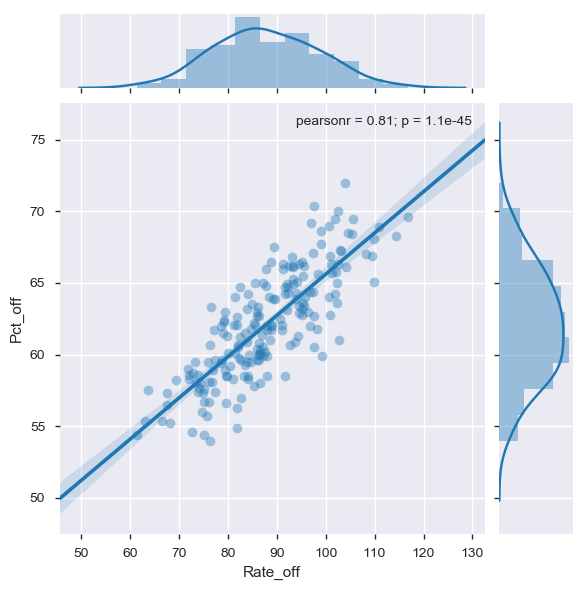

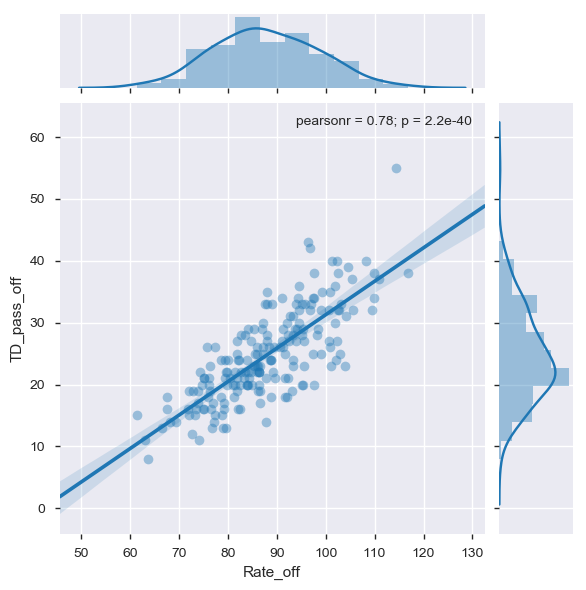

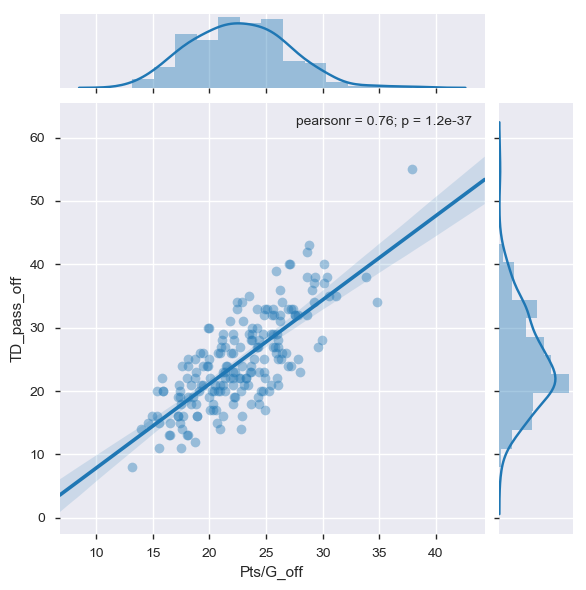

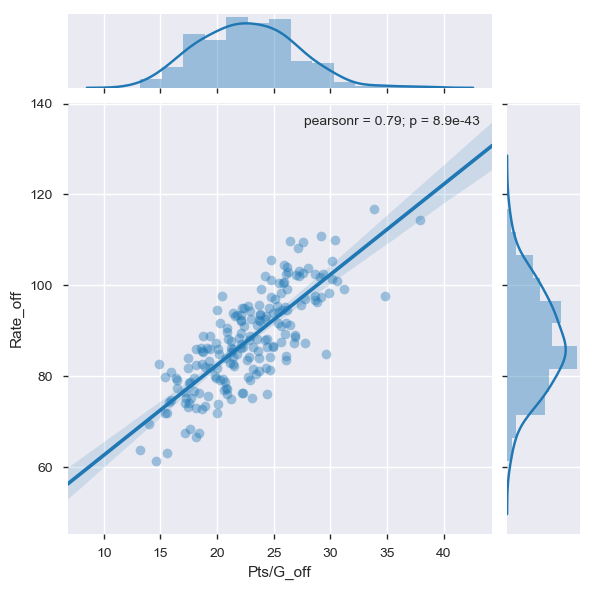

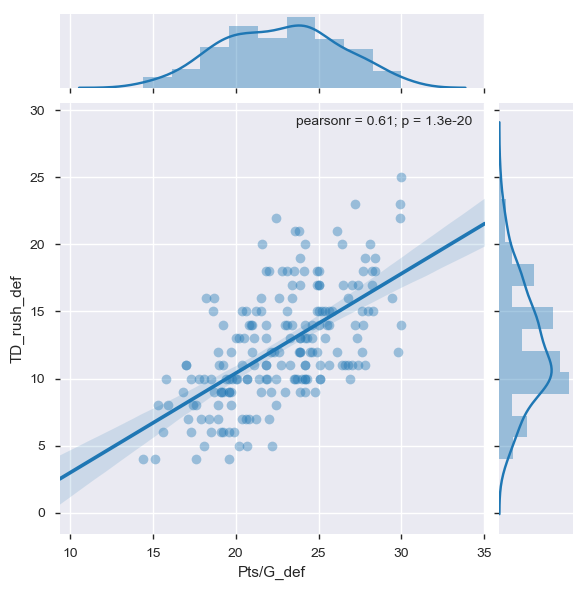

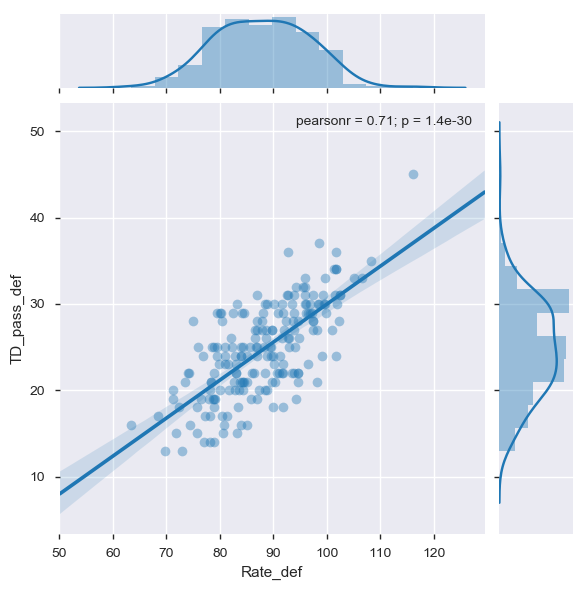

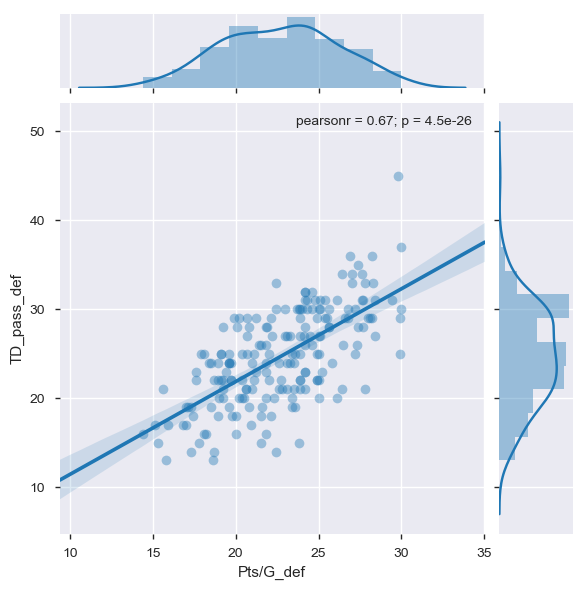

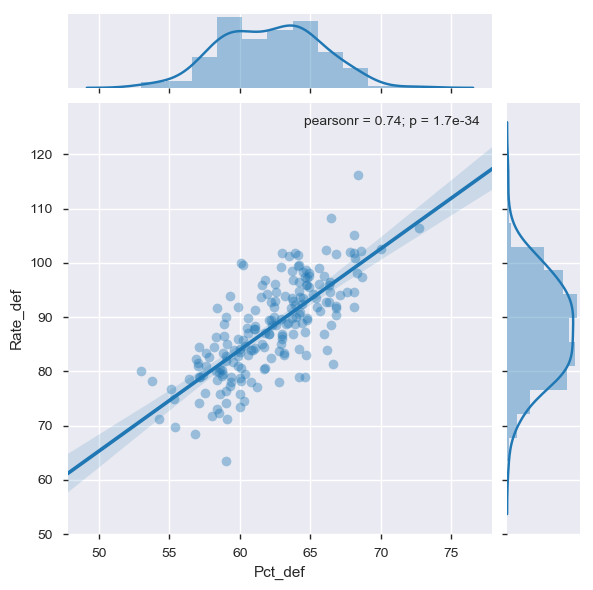

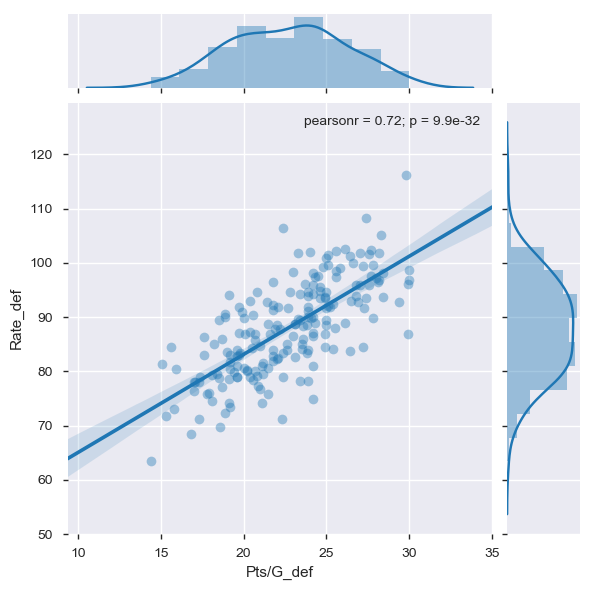

In [9]:
corr = X[X.columns[2:]].corr()

rows = corr.index
cols = corr.columns

ctr = 0

for r in range(len(rows)):
    for c in range(r+1, len(cols)):
        if abs(corr.iloc[r, c]) > 0.6:
            sns.jointplot(data=X, x=cols[c], y=rows[r], kind='reg', scatter_kws={'alpha': 0.4})
            ctr += 1
fig.tight_layout()



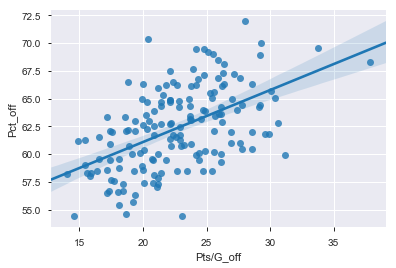

In [108]:
sns.regplot(data=X, x='Pts/G_off', y='Pct_off')

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[X.columns[2:]]), index=X.index, 
                        columns=X.columns[2:])
X_scaled.insert(0, 'Team', X['Team'])
X_scaled.insert(1, 'Year', X['Year'])
X_scaled.head()

,Team,Year,Yds/G_rush_off,TD_rush_off,Yds/G_pass_off,Pct_off,TD_pass_off,Sck_off,Rate_off,Pts/G_off,...,WR,nDL,nLB,nOL,nQB,nRB,nS,nST,nTE,nWR
0,PHI,2013,2.615227,1.446920,0.612275,-0.361547,0.983490,0.836994,1.395864,1.193784,...,0.930904,-0.252402,-0.806866,-1.231130,0.070976,-0.562430,-0.673871,-0.466252,-2.143044,0.525473
1,BUF,2013,1.768941,0.574953,-1.270671,-1.365466,-1.225049,1.034952,-1.280060,-0.352819,...,-0.821829,-0.790860,-2.374866,-0.585292,1.332776,-1.351805,-1.283021,1.398757,1.879091,0.525473
2,SF,2013,1.424157,1.228928,-1.500809,-1.039870,-0.534880,0.144139,0.333223,0.662139,...,0.544233,-0.252402,-0.284200,-0.585292,-1.190824,0.226945,-0.673871,-0.466252,-0.131976,-0.158069
3,SEA,2013,1.382366,0.356961,-1.022601,0.343910,0.293322,0.639035,1.366883,0.831299,...,0.524725,1.362972,-0.806866,-0.585292,-1.190824,-0.562430,-0.064722,-0.466252,-0.131976,-0.158069
4,WAS,2013,1.298782,0.356961,-0.060206,-1.148402,-0.672914,0.540056,-1.173796,-0.425316,...,1.001334,-0.252402,1.806466,-0.585292,0.070976,0.226945,-0.064722,1.398757,-0.131976,0.525473


So how do I want to set this up? I can use 2017 as the validation set to test the model after cross validation and then train/test split on the 2013-2016 data. 

In [78]:
from sklearn.model_selection import train_test_split

# create the validation set for 2017 data
X_valid = X_scaled.iloc[-32:]
y_valid = y.iloc[-32:]
# now train test split on the 2013-2016 data
X_train, X_test, y_train, y_test = train_test_split(X_scaled.iloc[:-32], y.iloc[:-32], test_size=0.3)

## Predict wins

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train[X_train.columns[2:]], y_train['W'])

y_pred = lr.predict(X_test[X_test.columns[2:]])

In [86]:
for i in range(len(y_pred)):
    print('{} - Actual Wins: {}, Predicted Wins: {:.2f}'
          .format(y_test.iloc[i, :2].values, y_test.iloc[i, 2], y_pred[i]))

['MIA' 2014] - Actual Wins: 8.0, Predicted Wins: 9.14
['DAL' 2016] - Actual Wins: 13.0, Predicted Wins: 10.57
['WAS' 2013] - Actual Wins: 3.0, Predicted Wins: 3.43
['OAK' 2014] - Actual Wins: 3.0, Predicted Wins: 2.62
['BAL' 2013] - Actual Wins: 8.0, Predicted Wins: 8.73
['HOU' 2013] - Actual Wins: 2.0, Predicted Wins: 1.76
['TB' 2013] - Actual Wins: 4.0, Predicted Wins: 4.53
['MIA' 2015] - Actual Wins: 6.0, Predicted Wins: 5.23
['MIA' 2016] - Actual Wins: 10.0, Predicted Wins: 7.32
['NYJ' 2016] - Actual Wins: 5.0, Predicted Wins: 2.70
['NO' 2013] - Actual Wins: 11.0, Predicted Wins: 11.13
['NO' 2015] - Actual Wins: 7.0, Predicted Wins: 5.04
['DAL' 2015] - Actual Wins: 4.0, Predicted Wins: 4.52
['TB' 2015] - Actual Wins: 6.0, Predicted Wins: 5.18
['BUF' 2016] - Actual Wins: 7.0, Predicted Wins: 6.82
['NE' 2016] - Actual Wins: 14.0, Predicted Wins: 14.68
['IND' 2013] - Actual Wins: 11.0, Predicted Wins: 10.26
['LAC' 2014] - Actual Wins: 9.0, Predicted Wins: 7.49
['KC' 2013] - Actual Win

In [87]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score: {}'.format(r2_score(y_test['W'], y_pred)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test['W'], y_pred))))

R2 score: 0.7694752198653729
RMSE: 1.4562438338563959


In [88]:
y_pred_valid = lr.predict(X_valid[X_valid.columns[2:]])

In [89]:
r2_score(y_valid['W'], y_pred_valid)

0.7457811326336878

In [93]:
for i in range(len(y_pred_valid)):
    print('{} - Actual Wins: {}, Predicted Wins: {:.2f}'
          .format(y_valid.iloc[i, :2].values, y_valid.iloc[i, 2], y_pred_valid[i]))

['JAC' 2017] - Actual Wins: 10.0, Predicted Wins: 12.26
['DAL' 2017] - Actual Wins: 9.0, Predicted Wins: 9.54
['PHI' 2017] - Actual Wins: 13.0, Predicted Wins: 13.37
['CAR' 2017] - Actual Wins: 11.0, Predicted Wins: 10.14
['NO' 2017] - Actual Wins: 11.0, Predicted Wins: 11.18
['BUF' 2017] - Actual Wins: 9.0, Predicted Wins: 7.93
['MIN' 2017] - Actual Wins: 13.0, Predicted Wins: 11.39
['LA' 2017] - Actual Wins: 11.0, Predicted Wins: 12.28
['KC' 2017] - Actual Wins: 10.0, Predicted Wins: 13.04
['NE' 2017] - Actual Wins: 13.0, Predicted Wins: 11.71
['BAL' 2017] - Actual Wins: 9.0, Predicted Wins: 12.09
['DEN' 2017] - Actual Wins: 5.0, Predicted Wins: 5.89
['ATL' 2017] - Actual Wins: 10.0, Predicted Wins: 8.83
['HOU' 2017] - Actual Wins: 4.0, Predicted Wins: 3.01
['TEN' 2017] - Actual Wins: 9.0, Predicted Wins: 8.45
['CHI' 2017] - Actual Wins: 5.0, Predicted Wins: 6.26
['GB' 2017] - Actual Wins: 7.0, Predicted Wins: 6.37
['CLE' 2017] - Actual Wins: 0.0, Predicted Wins: 2.81
['NYJ' 2017] - 